In [1]:
from dataloader import *
from VAE import *
from scores import *
from train import *
from cal_score import cal_bleu, cal_gaussian

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import random

In [24]:
torch.manual_seed(4)

In [25]:
model = torch.load('./models/demo_4997_seed_4')
model

CondVAE(
  (encoder_condition_embedding): Embedding(4, 8)
  (encoder): EncoderRNN(
    (embedding): Embedding(28, 264)
    (lstm): LSTM(264, 264)
  )
  (fc_mu): Linear(in_features=264, out_features=32, bias=True)
  (fc_logvar): Linear(in_features=264, out_features=32, bias=True)
  (fc_extend_latent): Linear(in_features=32, out_features=256, bias=True)
  (decoder_condition_embedding): Embedding(4, 8)
  (decoder): DecoderRNN(
    (embedding): Embedding(28, 264)
    (lstm): LSTM(264, 264)
    (out): Linear(in_features=264, out_features=28, bias=True)
  )
)

In [26]:
cal_bleu(model, print_result=True)

---------------------------------
input :  abandon
target:  abandoned
pred  :  abandoned
---------------------------------
input :  abet
target:  abetting
pred  :  abetting
---------------------------------
input :  begin
target:  begins
pred  :  begins
---------------------------------
input :  expend
target:  expends
pred  :  expends
---------------------------------
input :  sent
target:  sends
pred  :  sends
---------------------------------
input :  split
target:  splitting
pred  :  splitting
---------------------------------
input :  flared
target:  flare
pred  :  flake
---------------------------------
input :  functioning
target:  function
pred  :  function
---------------------------------
input :  functioning
target:  functioned
pred  :  functioned
---------------------------------
input :  healing
target:  heals
pred  :  heals
Average BLEU-4 score =  0.9285744042969881


0.9285744042969881

In [27]:
score = cal_gaussian(model, print_result =True)

['squeeze', 'squeezes', 'squeezing', 'squeezed']
['vereer', 'vereers', 'veereering', 'woreged']
['adjour', 'adjourns', 'adjourning', 'adjoured']
['spell', 'spells', 'spilling', 'sold']
['stammer', 'stammers', 'stammering', 'scratched']
['climb', 'climbs', 'climbing', 'climbed']
['leave', 'leaves', 'leaving', 'lefthed']
['prove', 'proves', 'proving', 'prove']
['jrum', 'jrums', 'jrumping', 'jumped']
['disobey', 'disobeys', 'disobeying', 'disobeyed']
['snock', 'snocks', 'snocking', 'snoched']
['bothen', 'bothens', 'bothening', 'bothened']
['expide', 'expines', 'expining', 'expined']
['dnounce', 'dnounces', 'dnouncing', 'disanagned']
['achieve', 'achieves', 'achieving', 'achieved']
['waagke', 'waags', 'warching', 'woreed']
['doubt', 'doubts', 'doubting', 'doubted']
['apprise', 'apprises', 'apprising', 'apprised']
['witch', 'witches', 'witching', 'witched']
['acquire', 'acquires', 'acquiring', 'acquired']
['attest', 'attests', 'attaching', 'attached']
['scapture', 'scaptures', 'scapturing',

In [2]:
ce_list = torch.load('./loss_lists/ce_loss/ce_cyclical_0816')
kld_list = torch.load('./loss_lists/kld_loss/kld_cyclical_0816')
bleu = torch.load('./loss_lists/bleu_list/bleu_cyclical_0816')

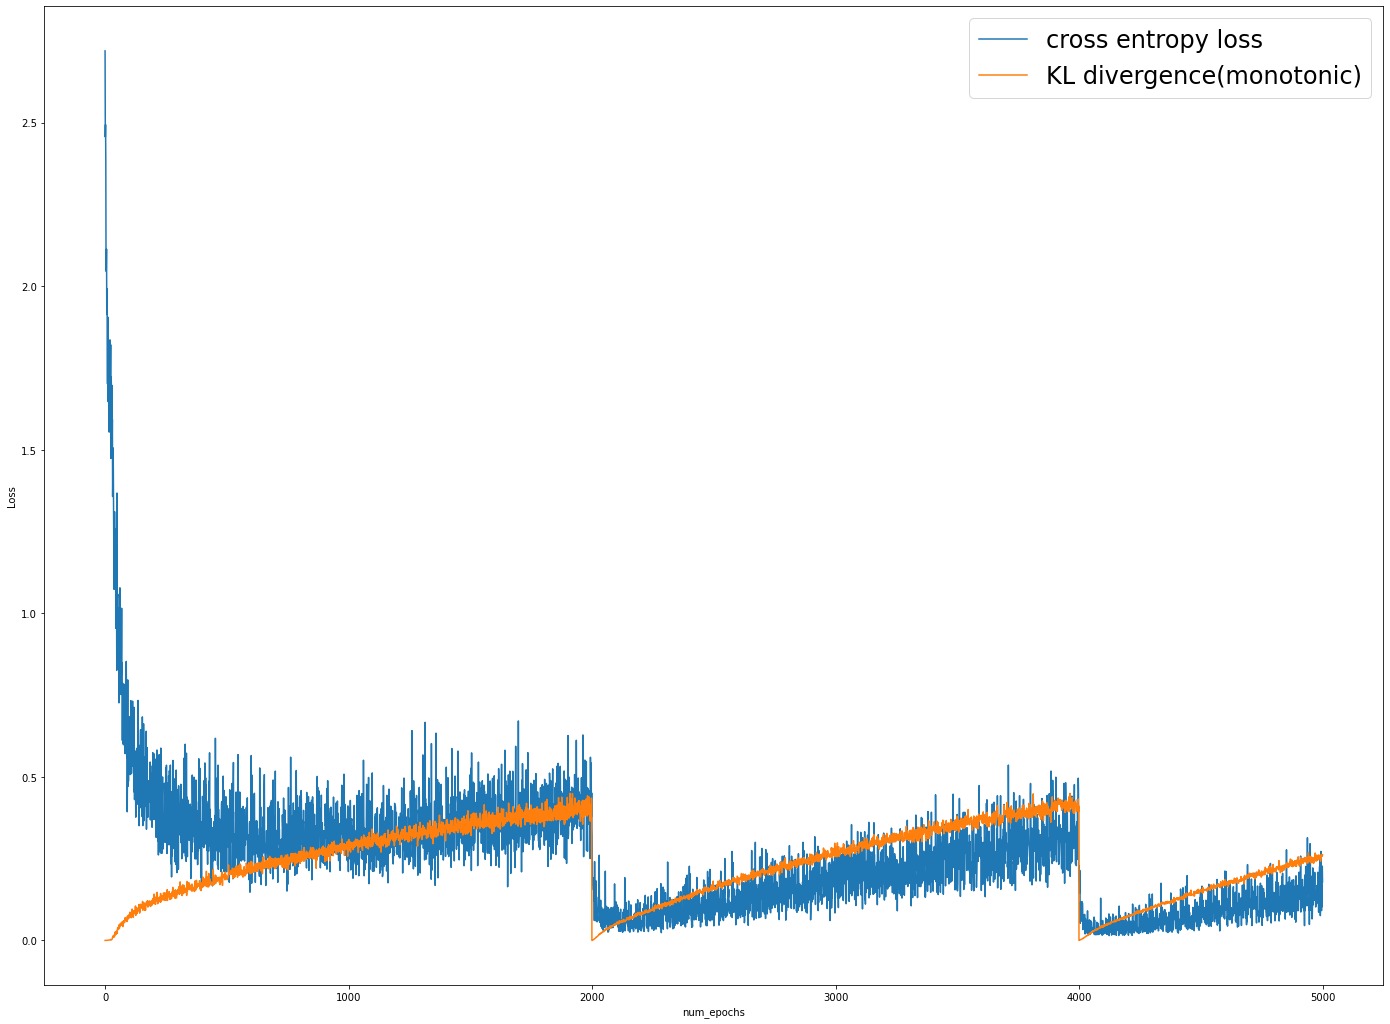

In [4]:
%matplotlib inline
plt.figure(figsize=(24,18))
plt.plot(ce_list, label='cross entropy loss')
plt.plot(kld_list, label='KL divergence(monotonic)')
plt.xlabel('num_epochs')
plt.ylabel('Loss')
plt.legend(fontsize=24)
plt.show()

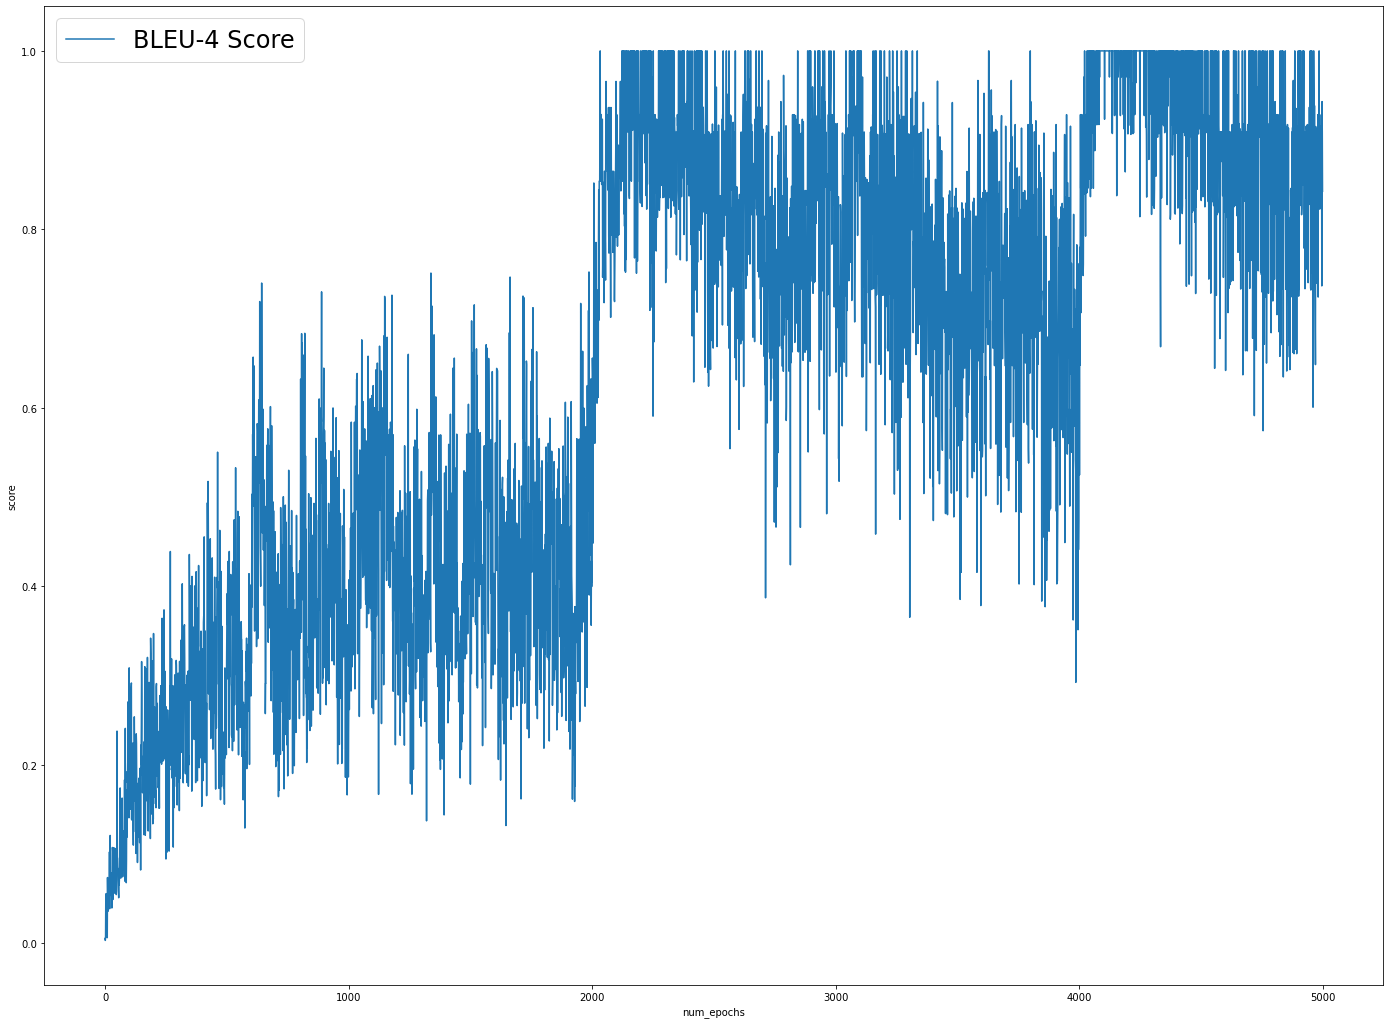

In [5]:
plt.figure(figsize=(24,18))
plt.plot(bleu, label='BLEU-4 Score')
plt.xlabel('num_epochs')
plt.ylabel('score')
plt.legend(fontsize=24)
plt.show()

In [19]:
x = 5500
discount = 500
months = 12

In [21]:
discount*months/(x*sum([i for i in range(months)]))

0.01652892561983471